In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
mnist = keras.datasets.mnist.load_data()

In [3]:
(x_train, y_train) , (x_test, y_test) = mnist

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train[0]

5

In [7]:
x_train[0].shape

(28, 28)

In [8]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

(-0.5, 27.5, 27.5, -0.5)

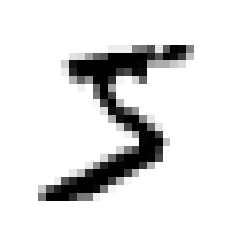

In [10]:
plt.imshow(x_train[0], cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

### Flattening the train and test arrays

In [11]:
train_flat = x_train.reshape(len(x_train), 28*28)
test_flat = x_test.reshape(len(x_test), 28*28)

In [12]:
train_flat[0] #single array

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### Model Creation

In [13]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation="sigmoid")
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

model.fit(train_flat, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 18.4921 - accuracy: 0.7692A: 0s - loss: 18.4968 - accuracy: 0.769
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 6.2364 - accuracy: 0.8761
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 5.5506 - accuracy: 0.8837
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 5.5469 - accuracy: 0.8839
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 5.3152 - accuracy: 0.8867


### After scaling the values

In [14]:
train_flat = train_flat/255
test_flat = test_flat/255

In [15]:
model.fit(train_flat, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2844 - accuracy: 0.8200
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8945 - accuracy: 0.8730
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6176 - accuracy: 0.8852
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4519 - accuracy: 0.8966
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3603 - accuracy: 0.9071


In [16]:
model.evaluate(test_flat, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3200 - accuracy: 0.9159


[0.3199675381183624, 0.9158999919891357]

(-0.5, 27.5, 27.5, -0.5)

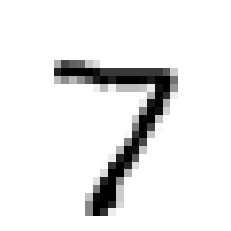

In [17]:
plt.imshow(x_test[0], cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")

In [18]:
y_pred = model.predict(test_flat)

In [19]:
y_pred[0] #highest for 7

array([4.18770015e-02, 2.86251307e-04, 2.29219198e-02, 7.26239502e-01,
       4.24499214e-02, 1.67730719e-01, 7.84639815e-06, 9.98478293e-01,
       1.22571975e-01, 7.23631501e-01], dtype=float32)

In [20]:
np.argmax(y_pred[0])

7

### Confusion Matrix

In [21]:
y_labels = [np.argmax(i) for i in y_pred] #convert into integer

In [22]:
import seaborn as sns

In [23]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_labels)

Text(69.0, 0.5, 'Actual')

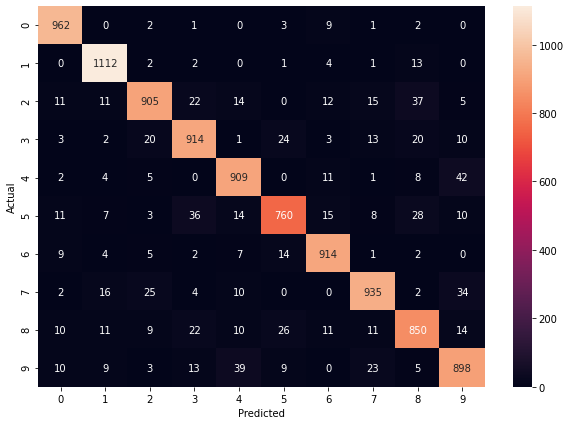

In [24]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

### Adding a Hidden Layer

In [25]:
model = keras.Sequential([
    keras.layers.Dense(200, input_shape=(784,), activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")
])

model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

model.fit(train_flat, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3971 - accuracy: 0.8884
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1043 - accuracy: 0.9688
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0665 - accuracy: 0.9795
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0459 - accuracy: 0.9856
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0353 - accuracy: 0.9890


#### Significant increase in accuracy

In [26]:
model.evaluate(test_flat, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0725 - accuracy: 0.9786


[0.07250568270683289, 0.978600025177002]

Text(69.0, 0.5, 'Actual')

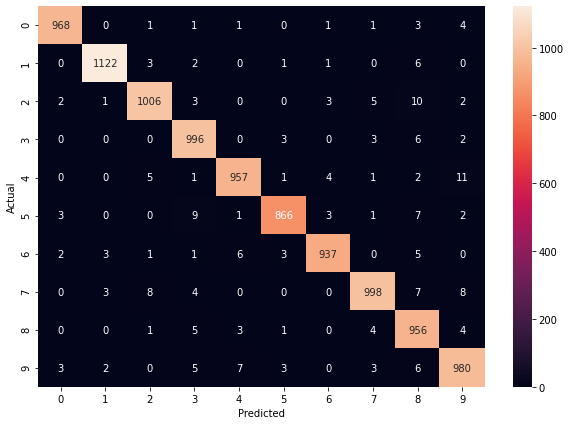

In [27]:
y_pred = model.predict(test_flat)
y_labels = [np.argmax(i) for i in y_pred]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_labels)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')